In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

## Exercise 11.1

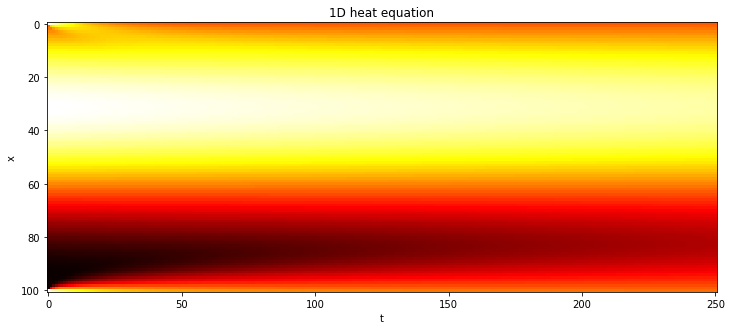

In [2]:
T = 20
L = 5
D, Nx, Nt = 0.01, 100, 250

x = np.linspace(0.0, L, Nx+1, dtype=float)
t = np.linspace(0.0, T, Nt+1, dtype=float)

dx = L / Nx
dt = T / Nt
r = D*dt / (dx*dx)
assert r < 0.5, 'formula is stable if r <= 0.5'

u = np.empty( (Nx+1,Nt+1), dtype=float )

# initial condition, t=0
u[:,0] = np.sin(x)

# boundary condition, x=0 and x=L
u[0,:] = np.exp(-t)
u[Nx,:] = 1/(t + 1)

for j in range(Nt):
    u[1:-1,j+1] = r*u[:-2,j] + (1-2*r)*u[1:-1,j] + r*u[2:,j]

# visualization
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("1D heat equation")
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.imshow(u, cmap='hot', interpolation='nearest')
plt.show()

## Exercise 11.2

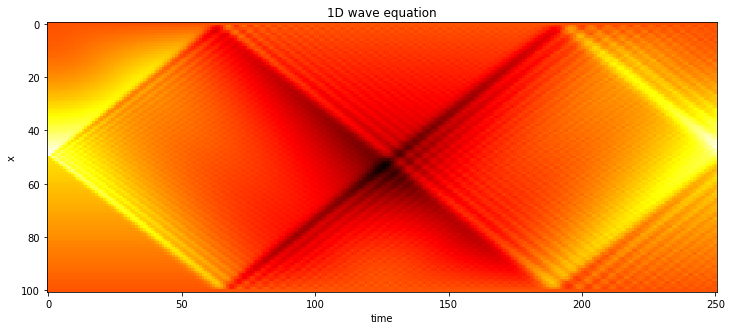

In [3]:
T = 20
L = 5
c, Nx, Nt = 0.5, 100, 250

t = np.linspace(0, T, Nt+1, dtype=float)
x = np.linspace(0, L, Nx+1, dtype=float)

dx = x[1] - x[0]
dt = t[1] - t[0]

r = (c*dt/dx)**2
assert r < 1, 'formula is stable if r <= 1'

u = np.empty( (Nx+1,Nt+1), dtype=float )  # all results

# initial condition, t=0, j=0
# initial shape of the string
u[:,0] = np.where(x < L/2, x**2, L - x)

assert u[0,0] == 0 and u[Nx,0] == 0

# boundary condition, x=0 and x=L
u[0,:] = 0
u[Nx,:] = 0

u[1:-1,1] = u[1:-1,0] + (r*0.5)*( u[:-2,0] -2*u[1:-1,0] + u[2:,0] )

for j in range(1,Nt):
    u[1:-1,j+1] = -u[1:-1,j-1] +2*u[1:-1,j] + r*(u[:-2,j] -2*u[1:-1,j] + u[2:,j])

# visualization
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("1D wave equation")
ax.set_xlabel("time")
ax.set_ylabel("x")
ax.imshow(u, cmap='hot', interpolation='nearest')
plt.show()